Running Expt to Understand GD Dynamic Learning rates!<br>
Author: Lawrence M.<br>
Tutor: MxCohen<br>
code rewritten and modifed by Me.2022/01/11<br>

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import sympy

from IPython import display

GD using fixed learning_rate

<ipython-input-35-428f9df7af22>:29: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  model_param_fixed[i:] = local_minimum,gradient,learning_rate


[0.5]


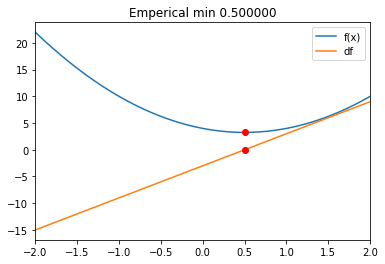

In [35]:
#The function.
np.random.seed(10)
x = np.linspace(-2,2,201)

#definng the fxn.
def fx(x):
    return 3*x**2 - 3*x + 4

#derivative function.
def deriv(x):
    return 6*x - 3

#define the gradient descent algol

#A. learning parameters.
learning_rate = 0.1
local_minimum = np.random.choice(x,1)
init_value = local_minimum[:]
training_epochs = 100

#run and store all the results.
model_param_fixed = np.zeros((training_epochs,3))

for i in range(training_epochs):
    gradient = deriv(local_minimum)
    local_minimum -= learning_rate * gradient

    #store the parameters.
    model_param_fixed[i:] = local_minimum,gradient,learning_rate
print(local_minimum)



#quick (inspection calls.)
plt.plot(x,fx(x),x,deriv(x))
plt.plot(local_minimum,fx(local_minimum),'ro')
plt.plot(local_minimum,deriv(local_minimum),'ro')
plt.xlim(x[[0,-1]])
plt.legend(['f(x)','df'])
plt.title(f'Emperical min %f'%(local_minimum))
plt.show()

 GD using a gradient based learning rate.

<ipython-input-36-c38092159c13>:20: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  model_param_gradient[i,:] = local_minimum,gradient,learning_rate


[0.5]


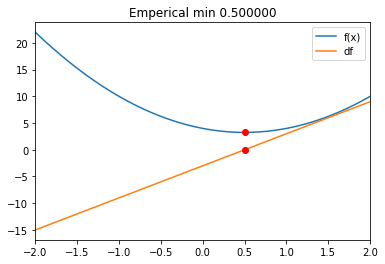

In [36]:
#A. learning parameters.
learning_rate = 0.01
local_minimum = np.random.choice(x,1)
init_value = local_minimum[:]
training_epochs = 100

#run and store all the results.
model_param_gradient = np.zeros((training_epochs,3))

for i in range(training_epochs):
    #get the derivative.
    gradient = deriv(local_minimum)

    #update learning rate arcodding to gradient.
    learning_rate *= np.abs(gradient)

    local_minimum -= learning_rate * gradient

    #store the parameters.
    model_param_gradient[i,:] = local_minimum,gradient,learning_rate
print(local_minimum)



#quick (inspection calls.)
plt.plot(x,fx(x),x,deriv(x))
plt.plot(local_minimum,fx(local_minimum),'ro')
plt.plot(local_minimum,deriv(local_minimum),'ro')
plt.xlim(x[[0,-1]])
plt.legend(['f(x)','df'])
plt.title(f'Emperical min %f'%(local_minimum))
plt.show()

GD time based.

<ipython-input-37-947aae939cf8>:19: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  model_param_time[i,:] = local_minimum,gradient,learning_rate


[0.5]


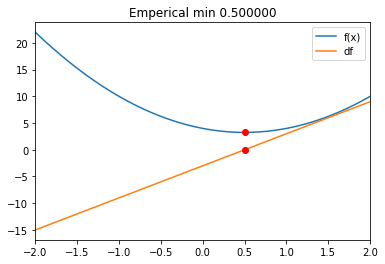

In [37]:
#A.Redefine learning parameters.
learning_rate = 0.01
local_minimum = init_value


#run and store all the results.
model_param_time = np.zeros((training_epochs,3))

for i in range(training_epochs):
    #get the derivative.
    gradient = deriv(local_minimum)

    #update learning rate arcodding to 
    learning_rate *= (1-(i+1)/training_epochs)

    local_minimum -= learning_rate * gradient

    #store the parameters.
    model_param_time[i,:] = local_minimum,gradient,learning_rate
print(local_minimum)

#quick (inspection calls.)
plt.plot(x,fx(x),x,deriv(x))
plt.plot(local_minimum,fx(local_minimum),'ro')
plt.plot(local_minimum,deriv(local_minimum),'ro')
plt.xlim(x[[0,-1]])
plt.legend(['f(x)','df'])
plt.title(f'Emperical min %f'%(local_minimum))
plt.show()

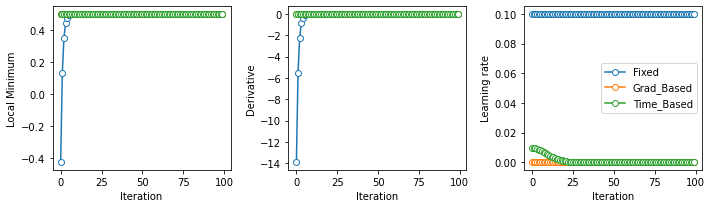

In [38]:
#Ploting the results.

fig,ax = plt.subplots(1,3,figsize=(10,3))

for i in range(3):
    ax[i].plot(model_param_fixed[:,i],'o-', markerfacecolor='w')
    ax[i].plot(model_param_gradient[:,i],'o-', markerfacecolor='w')
    ax[i].plot(model_param_time[:,i],'o-', markerfacecolor='w')
    ax[i].set_xlabel('Iteration')

ax[0].set_ylabel('Local Minimum')
ax[1].set_ylabel('Derivative')
ax[2].set_ylabel('Learning rate')
ax[2].legend(['Fixed','Grad_Based','Time_Based'])

plt.tight_layout()
plt.show()
